Coordinates
ParticleIDs
Velocities


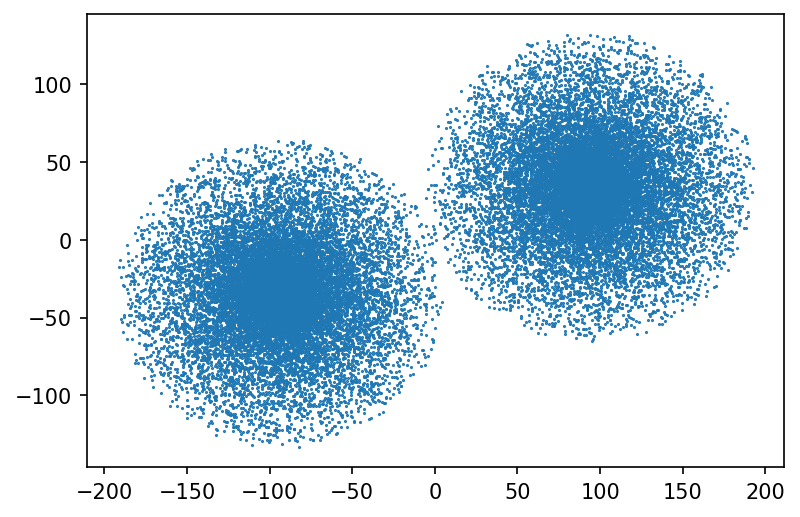

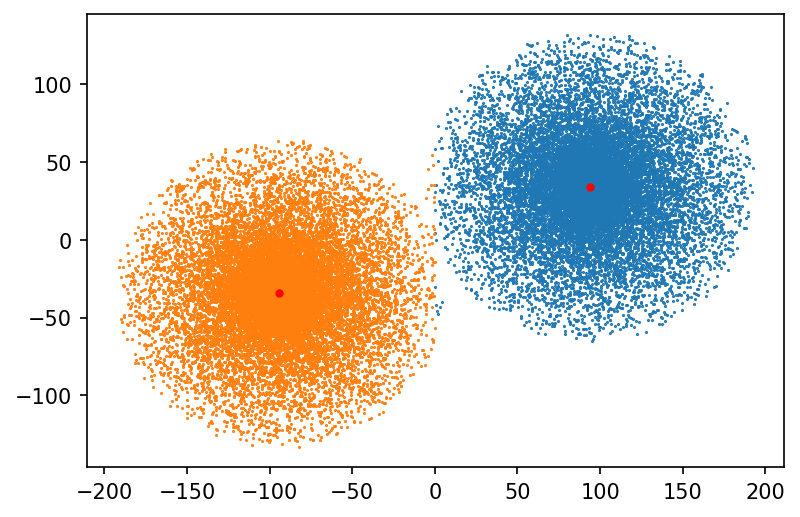

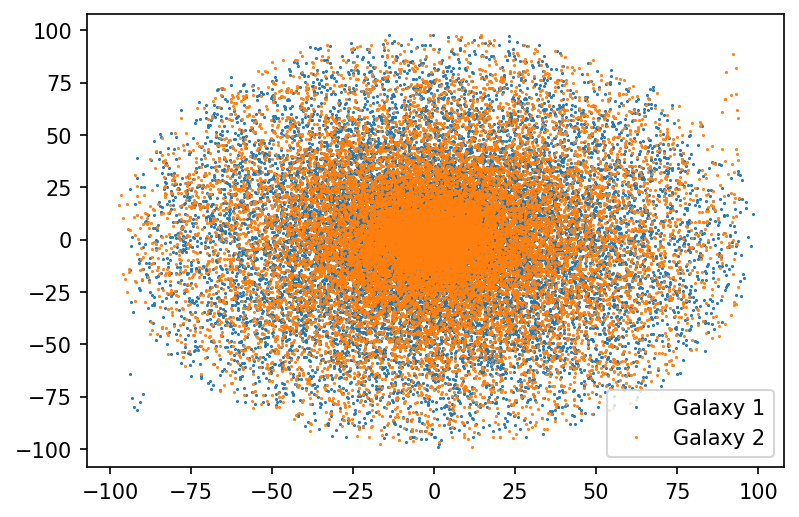

In [57]:

#Packages
import h5py    
import numpy as np    
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit as fit
import func

#Directory with data:
datadir = "/home/andy/gadget4/examples/G2-galaxy/output/"

#Importing data (Particle Type 1 - dark matter, Particle Type 2 - baryonic matter):
f = h5py.File(datadir+"snapshot_000.hdf5", "r")
group = f["PartType1"]

    #Checkout what keys are inside that group.
for key in group.keys():
    print(key)
    
data = group["Coordinates"][()]

#Plotting the initial conditions of both galaxies:
plt.figure(dpi=150)
plt.plot(data[:,0],data[:,1],'.',ms=1)

#Splitting the coordinate vector for both galaxies:
gal1x,gal1y,gal1z,gal2x,gal2y,gal2z = [],[],[],[],[],[]
for i in range(0,(len(data[:,0])-1)):
    if (data[i,0]>0):
        gal1x.append(data[i,0])
        gal1y.append(data[i,1])
        gal1z.append(data[i,2])
    if (data[i,0]<0):
        gal2x.append(data[i,0])
        gal2y.append(data[i,1])
        gal2z.append(data[i,2])
        
gal1coords=[gal1x,gal1y,gal1z]
gal2coords=[gal2x,gal2y,gal2z]

#Plotting both galaxies separately just in case:
plt.figure(dpi=150)
plt.plot(gal1coords[0],gal1coords[1],'.',ms=1)
plt.plot(gal2coords[0],gal2coords[1],'.',ms=1)

#Looking for the center of each galaxy and plot checking:
gal1cen = [np.median(gal1x),np.median(gal1y),np.median(gal1z)]
gal2cen = [np.median(gal2x),np.median(gal2y),np.median(gal2z)]

plt.plot(gal1cen[0],gal1cen[1],'ro',ms=3)
plt.plot(gal2cen[0],gal2cen[1],'ro',ms=3)

    #Particle masses for each galaxy (assuming MW mass 10^12 Msol):
mp1=(10**12)/(len(gal1coords[0]))                                   #keep in mind this are not real particles, are huge groups of "real particles".
mp2=(10**12)/(len(gal2coords[0]))

#Centering coordinates to have the center of each galaxy in 0,0,0:

gal1coords=np.array(gal1coords) - np.resize(np.array(gal1cen),(3,1))
gal2coords=np.array(gal2coords) - np.resize(np.array(gal2cen),(3,1))

plt.figure(dpi=150)
plt.plot(gal1coords[0],gal1coords[1],'.',ms=1,label='Galaxy 1')
plt.plot(gal2coords[0],gal2coords[1],'.',ms=1,label='Galaxy 2')
plt.legend()


#Calculating radial distance to center of the galaxy for each particle:
gal1dist = []
gal2dist = []

for i in range(0,(len(gal1coords[0])-1)):
    d=np.sqrt((gal1coords[0,i]**2)+(gal1coords[1,i]**2)+(gal1coords[2,i]**2))
    gal1dist.append(d)
for i in range(0,(len(gal2coords[0])-1)):
    d=np.sqrt((gal2coords[0,i]**2)+(gal2coords[1,i]**2)+(gal2coords[2,i]**2))
    gal2dist.append(d)

#After you are done
f.close()

<ipython-input-69-98943b02d52c>:31: RuntimeWarning: divide by zero encountered in log10
  logprof1=np.log10(prof1)
<ipython-input-69-98943b02d52c>:53: RuntimeWarning: divide by zero encountered in log10
  logprof2=np.log10(prof2)


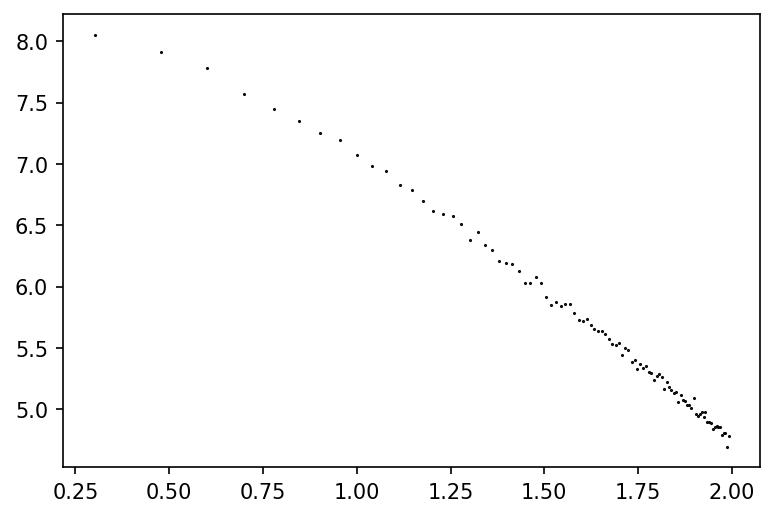

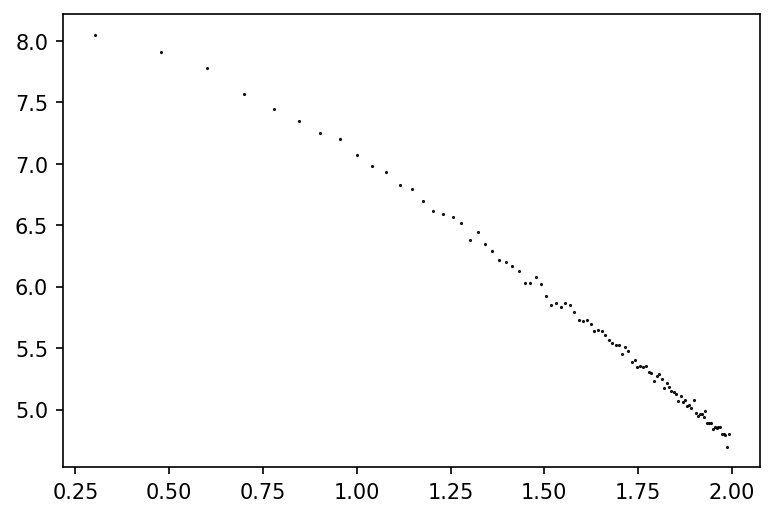

In [69]:
# As we see, density is not well presented because for same radius bins the variation in volume is not constant.
# We have to make sure each new bin we take holds the same volume as the bin before. To do this we will define
# an initial volume Vbin and replicate it for each bin. We will choose a distance of 1 to the center for it.

R1max=np.amax(gal1dist)
R2max=np.amax(gal2dist)

# (4/3)*pi*Rn^2=nVbin for each radius this has to be fulfilled.


#GALAXY 1:
prof1=[],[]                  # Profile vector with two components, radial distance and mass at this distance.
Rbin=1
Rins=0

for n in range(2,100):
    R1=Rins
    if (R1>R1max):
        break
    R2=n*Rbin
    Npart=0
    for i in range(0,len(gal1dist)):            # Loop that checks for parwticles between both radius and counts them.
        if (gal1dist[i]>R1 and gal1dist[i]<R2):
            Npart+=1
    dens1=Npart/(1.25*pi*(R2**3-R1**3))
    prof1[0].append(R1)
    prof1[1].append(dens1*mp1)
    Rins=R2


logprof1=np.log10(prof1)    
    
    
#GALAXY 2:
prof2=[],[]                  # Profile vector with two components, radial distance and mass at this distance.
Rbin=1
Rins=0

for n in range(2,100):
    R1=Rins
    if (R1>R2max):
        break
    R2=n*Rbin
    Npart=0
    for i in range(0,len(gal2dist)):            # Loop that checks for parwticles between both radius and counts them.
        if (gal2dist[i]>R1 and gal2dist[i]<R2):
            Npart+=1
    dens2=Npart/(1.25*pi*(R2**3-R1**3))
    prof2[0].append(R1)
    prof2[1].append(dens2*mp2)
    Rins=R2

logprof2=np.log10(prof2)
    
#Plotting radial profiles:
plt.figure(dpi=150)
plt.plot(logprof1[0],logprof1[1],'k.',ms=1)

plt.figure(dpi=150)
plt.plot(logprof2[0],logprof2[1],'k.',ms=1)

### Profile fitting to NFW density profile

<ipython-input-66-4971ff35494f>:5: RuntimeWarning: divide by zero encountered in log10
  return np.log10(rho0)-(np.log10(r/Rs)+2*np.log10(1+r/Rs))
/home/andy/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


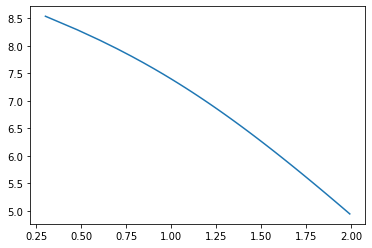

In [66]:

init_guesses=[10**8,10]
r=10**logprof1[0]

def logNFW(r,rho0,Rs):
    return np.log10(rho0)-(np.log10(r/Rs)+2*np.log10(1+r/Rs))

popt,pcov=fit(logNFW,r,logprof1[1],[10**8,10])
plt.plot(logprof1[0],logNFW(r,popt[0],popt[1]))

In [52]:
print(func.logNFW)

<function logNFW at 0x7f9c601a1670>


<ipython-input-66-4971ff35494f>:5: RuntimeWarning: divide by zero encountered in log10
  return np.log10(rho0)-(np.log10(r/Rs)+2*np.log10(1+r/Rs))


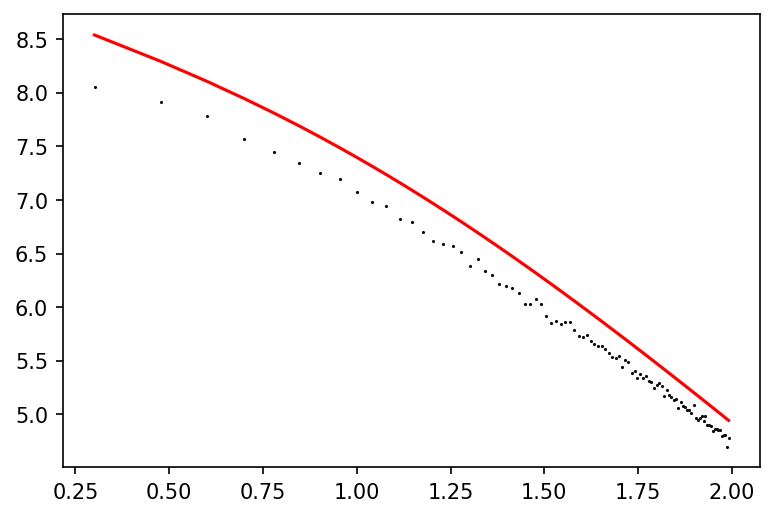

In [67]:
#Plotting radial profiles:
plt.figure(dpi=150)
plt.plot(logprof1[0],logprof1[1],'k.',ms=1)

plt.plot(logprof1[0],logNFW(r,popt[0],popt[1]),'r-')

In [71]:
prof1[1]

[288171306.9537644,
 112620598.00693786,
 81584709.27046996,
 60343452.737714276,
 36950871.24560442,
 28181541.655373137,
 22383700.850702677,
 17843333.719773784,
 15838817.629555948,
 11928775.037060566,
 9560660.698022103,
 8771862.752164911,
 6706058.0688382955,
 6196852.578809793,
 4981681.891232193,
 4131292.7009743266,
 3922230.1381114633,
 3745403.8076912034,
 3270725.7058585994,
 2414042.783266799,
 2800822.112860082,
 2188491.5887504504,
 1983167.2681194122,
 1633655.2598174636,
 1566809.2275989014,
 1523344.5862352771,
 1352834.5775193826,
 1066195.3560068274,
 1078071.4628383857,
 1191085.174959489,
 1065326.3295800004,
 823936.5528351722,
 714958.503830798,
 749016.8587691892,
 690572.5828972919,
 720172.3433077654,
 721523.5718652367,
 610062.9104346397,
 536030.7859787394,
 528006.1131047831,
 544773.4835438406,
 486534.16545980924,
 448717.7504323669,
 437353.6580691193,
 434746.88606614387,
 408396.09927127004,
 374447.30622817617,
 342922.2241383477,
 337870.54856134